In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# import pandas as pd
# import gzip

# def parse(path):
#     g = gzip.open(path, 'rb')
#     for l in g:
#         yield eval(l)

# def getDF(path):
#     i = 0
#     df = {}
#     for d in parse(path):
#         if i % 10000 == 0:
#             print(i)
#         df[i] = d
#         i += 1
#         if i >= 100000:
#             break
#     return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
# df = getDF('reviews_Electronics.json.gz')
df = pd.read_csv('/content/drive/MyDrive/Professional/Break Through AI/BTAI Verizon Project/shortened_data.csv', index_col=[0])

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""","[1, 1]",Corey Barker does a great job of explaining Bl...,5.0,Very thorough,1365811200,"04 13, 2013"
1,A2CX7LUOHB2NDG,0321732944,Bernie,"[0, 0]",While many beginner DVDs try to teach you ever...,5.0,Adobe Photoshop CS5 Crash Course with master P...,1341100800,"07 1, 2012"
2,A2NWSAGRHCP8N5,0439886341,bowmans2007,"[1, 1]",It never worked. My daughter worked to earn th...,1.0,absolutely horrible,1367193600,"04 29, 2013"
3,A2WNBOD3WNDNKT,0439886341,JAL,"[1, 1]",Some of the functions did not work properly. ...,3.0,Disappointing,1374451200,"07 22, 2013"
4,A1GI0U4ZRJA8WN,0439886341,Truthfull,"[4, 4]",Do not waste your money on this thing it is te...,1.0,TERRIBLE DONT WASTE YOUR MONEY,1334707200,"04 18, 2012"


In [ ]:
def sentiment(x):
    if x >= 4:
        return 1
    elif x >= 3:
        return 0
    else:
        return -1

In [ ]:
df['sentiment'] = df['overall'].apply(sentiment)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""","[1, 1]",Corey Barker does a great job of explaining Bl...,5.0,Very thorough,1365811200,"04 13, 2013",1
1,A2CX7LUOHB2NDG,0321732944,Bernie,"[0, 0]",While many beginner DVDs try to teach you ever...,5.0,Adobe Photoshop CS5 Crash Course with master P...,1341100800,"07 1, 2012",1
2,A2NWSAGRHCP8N5,0439886341,bowmans2007,"[1, 1]",It never worked. My daughter worked to earn th...,1.0,absolutely horrible,1367193600,"04 29, 2013",-1
3,A2WNBOD3WNDNKT,0439886341,JAL,"[1, 1]",Some of the functions did not work properly. ...,3.0,Disappointing,1374451200,"07 22, 2013",0
4,A1GI0U4ZRJA8WN,0439886341,Truthfull,"[4, 4]",Do not waste your money on this thing it is te...,1.0,TERRIBLE DONT WASTE YOUR MONEY,1334707200,"04 18, 2012",-1


In [ ]:
df = df.sort_values(by='sentiment', axis=0).reset_index().drop(['index'], axis=1)

In [ ]:
df.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
119995,AYY03PZFCZM8U,B00003CWDQ,"""keeo""","[37, 41]","I have a 36 inch Sony Wega TV, Pioneer DVC302D...",5.0,Monster Cable MP HTS800 HP Surge Protector,962064000,"06 27, 2000",1
119996,A14Z5WB3DAFQGU,B00003CWDQ,"Karl W. Mueller ""RevvedWeb.com""","[1, 3]",Can't tell any difference as far as a cleaner ...,4.0,Guess it's fine - as long as it protects my sy...,1179360000,"05 17, 2007",1
119997,A3GIZQAP2J6JLU,B00003CWDQ,"K. Anderson ""Picky Consumer""","[1, 6]",I have owned this power center for about a mon...,5.0,So Far So Good!,1166313600,"12 17, 2006",1
119998,AHXN03152761I,B00003CWDQ,Jose Ramirez Garrido,"[0, 1]",1st of all i did not get the one in the pictur...,5.0,Must have!!,1316390400,"09 19, 2011",1
119999,AKM1MP6P0OYPR,0132793040,"Vicki Gibson ""momo4""","[1, 1]",Corey Barker does a great job of explaining Bl...,5.0,Very thorough,1365811200,"04 13, 2013",1


In [ ]:
df.drop(labels=(range(30000, 40000)), axis=0, inplace=True)
df.drop(labels=(range(70000, 80000)), axis=0, inplace=True)
df.drop(labels=(range(110000, 120000)), axis=0, inplace=True)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A13T2XWEGL7DU7,B00005T406,"Stuart Sweetow ""sweetow""","[1, 8]",This is a cheap trackball mouse and not as goo...,1.0,Marble Mouse Not a Man,1182124800,"06 18, 2007",-1
1,A3ROMB95RLWSHV,B00007FGU7,Clutch,"[0, 0]",The cable I was shipped is not the one shown. ...,2.0,Not What was Shown,1387497600,"12 20, 2013",-1
2,A22WDNLXFIETW5,B00007FGU7,Clintre,"[1, 1]",Just has too much noise. Anything I hook up ha...,1.0,Buzz,1382486400,"10 23, 2013",-1
3,A3RC8EMENZVZN6,B00007FGU7,Claudia R. Bautista,"[0, 0]",The length is perfect for my dorm room but I t...,1.0,No good,1402531200,"06 12, 2014",-1
4,AFT8YMKCMJ3GC,B00007FGU7,Chris R,"[0, 0]",This cable does not connect properly and sound...,1.0,Bad Connection doesn't work,1397001600,"04 9, 2014",-1
...,...,...,...,...,...,...,...,...,...,...
109995,ADW4R2F0W1MNE,B000023VUL,James McNeal,"[7, 7]",I purchased this hub to increase the number of...,5.0,Great device at a great price,986342400,"04 4, 2001",1
109996,A1ORUSHRRG0VWN,B000023VUL,F. A. Soares,"[4, 4]",I bought this hub several months ago and I am ...,5.0,An awesome product,970358400,"10 1, 2000",1
109997,A7IKOAH6M8WAC,B000023VUL,Eric,"[2, 3]",I have had this for awhile and have not had an...,5.0,Works great!,1047859200,"03 17, 2003",1
109998,A1PIHNRD8UIWEX,B000023VUL,D. Berglind,"[7, 7]","This Hub is very small, easy to install, and i...",5.0,Simple to use/Easy on the wallet,964483200,"07 25, 2000",1


In [ ]:
df['reviewText'] = df['reviewText'].str.lower()

In [ ]:
df['sentiment'].value_counts()

-1    30000
 1    30000
 0    30000
Name: sentiment, dtype: int64

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A13T2XWEGL7DU7,B00005T406,"Stuart Sweetow ""sweetow""","[1, 8]",this is a cheap trackball mouse and not as goo...,1.0,Marble Mouse Not a Man,1182124800,"06 18, 2007",-1
1,A3ROMB95RLWSHV,B00007FGU7,Clutch,"[0, 0]",the cable i was shipped is not the one shown. ...,2.0,Not What was Shown,1387497600,"12 20, 2013",-1
2,A22WDNLXFIETW5,B00007FGU7,Clintre,"[1, 1]",just has too much noise. anything i hook up ha...,1.0,Buzz,1382486400,"10 23, 2013",-1
3,A3RC8EMENZVZN6,B00007FGU7,Claudia R. Bautista,"[0, 0]",the length is perfect for my dorm room but i t...,1.0,No good,1402531200,"06 12, 2014",-1
4,AFT8YMKCMJ3GC,B00007FGU7,Chris R,"[0, 0]",this cable does not connect properly and sound...,1.0,Bad Connection doesn't work,1397001600,"04 9, 2014",-1


In [ ]:
df.drop(['unixReviewTime', 'reviewTime'], axis=1, inplace=True)

In [ ]:
stopwords_to_keep = ['against', 'no', 'nor', 'not', 'don', "don't", 'should', "should've", 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
                     "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
                     'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
stop = stopwords.words('english')
stop = list(set(stop).difference(set(stopwords_to_keep)))

pat = r'\b(?:{})\b'.format('|'.join(stop))
df['processed_text'] = df['reviewText'].str.replace(pat, '')
df['processed_text'] = df['processed_text'].str.replace(r'\s+', ' ')


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,sentiment,processed_text
0,A13T2XWEGL7DU7,B00005T406,"Stuart Sweetow ""sweetow""","[1, 8]",this is a cheap trackball mouse and not as goo...,1.0,Marble Mouse Not a Man,-1,cheap trackball mouse not good microsoft trac...
1,A3ROMB95RLWSHV,B00007FGU7,Clutch,"[0, 0]",the cable i was shipped is not the one shown. ...,2.0,Not What was Shown,-1,cable shipped not one shown. huge! instead si...
2,A22WDNLXFIETW5,B00007FGU7,Clintre,"[1, 1]",just has too much noise. anything i hook up ha...,1.0,Buzz,-1,much noise. anything hook buzz sound . would ...
3,A3RC8EMENZVZN6,B00007FGU7,Claudia R. Bautista,"[0, 0]",the length is perfect for my dorm room but i t...,1.0,No good,-1,length perfect dorm room tried 3 different he...
4,AFT8YMKCMJ3GC,B00007FGU7,Chris R,"[0, 0]",this cable does not connect properly and sound...,1.0,Bad Connection doesn't work,-1,cable not connect properly sound distorted. u...


In [ ]:
new_df = df.dropna()
new_df = new_df.reset_index()

In [ ]:
new_df['sentiment'].value_counts()

-1    29926
 0    29920
 1    29869
Name: sentiment, dtype: int64

In [ ]:
new_df.head()

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,sentiment,processed_text
0,0,A13T2XWEGL7DU7,B00005T406,"Stuart Sweetow ""sweetow""","[1, 8]",this is a cheap trackball mouse and not as goo...,1.0,Marble Mouse Not a Man,-1,cheap trackball mouse not good microsoft trac...
1,1,A3ROMB95RLWSHV,B00007FGU7,Clutch,"[0, 0]",the cable i was shipped is not the one shown. ...,2.0,Not What was Shown,-1,cable shipped not one shown. huge! instead si...
2,2,A22WDNLXFIETW5,B00007FGU7,Clintre,"[1, 1]",just has too much noise. anything i hook up ha...,1.0,Buzz,-1,much noise. anything hook buzz sound . would ...
3,3,A3RC8EMENZVZN6,B00007FGU7,Claudia R. Bautista,"[0, 0]",the length is perfect for my dorm room but i t...,1.0,No good,-1,length perfect dorm room tried 3 different he...
4,4,AFT8YMKCMJ3GC,B00007FGU7,Chris R,"[0, 0]",this cable does not connect properly and sound...,1.0,Bad Connection doesn't work,-1,cable not connect properly sound distorted. u...


In [ ]:
positive_reviews = new_df[new_df['sentiment'] == 1]
neutral_reviews = new_df[new_df['sentiment'] == 0]
negative_reviews = new_df[new_df['sentiment'] == -1]

## Distribution of sentiment/reviews of given data



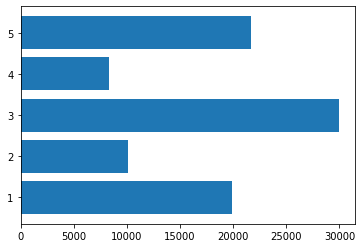

In [ ]:
fivestar = df[df["overall"] == 5.0].count()
fourstar = df[df["overall"] == 4.0].count()
threestar = df[df["overall"] == 3.0].count()
twostar = df[df["overall"] == 2.0].count()
onestar = df[df["overall"] == 1.0].count()
ratingnumber = [onestar["overall"], twostar["overall"], threestar["overall"], fourstar["overall"], fivestar["overall"]]
rating = [1.0, 2.0, 3.0, 4.0, 5.0]

plt.barh(rating, ratingnumber)
plt.show()

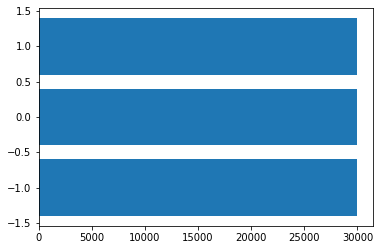

In [ ]:
negative = df[df["sentiment"] == -1].count()
neutral = df[df["sentiment"] == 0].count()
positive = df[df["sentiment"] == 1].count()
ratingnumber = [negative['sentiment'], neutral['sentiment'], positive['sentiment']]
rating = [-1, 0, 1]

plt.barh(rating, ratingnumber)
plt.show()

# Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
new_df['lemmatized_text'] = new_df['processed_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(y) for y in word_tokenize(x)]))

# Frequency of Words Based on Sentiment


In [ ]:
# exclude words that appear in fewer than 5% of reviews or more than 90% of reviews
vectorizer = CountVectorizer(min_df=.01, max_df = .95)

In [ ]:
X = vectorizer.fit_transform(new_df['lemmatized_text'])

In [ ]:
X.shape

(89715, 843)

In [ ]:
pos_feats = X[new_df[new_df['sentiment'] == 1].index, :] 
neut_feats =  X[new_df[new_df['sentiment'] == 0].index, :]
neg_feats =  X[new_df[new_df['sentiment'] == -1].index, :]

In [ ]:
def plot_top_ten_features(features, feature_names):
    features = np.array(features)[0]
    top_ten_features = features.argsort()[-10:]
    top_ten_words = dict()
    for i in top_ten_features:
        word = feature_names[i]
        top_ten_words[word] = features[i] 
        
    plt.bar(top_ten_words.keys(), top_ten_words.values())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


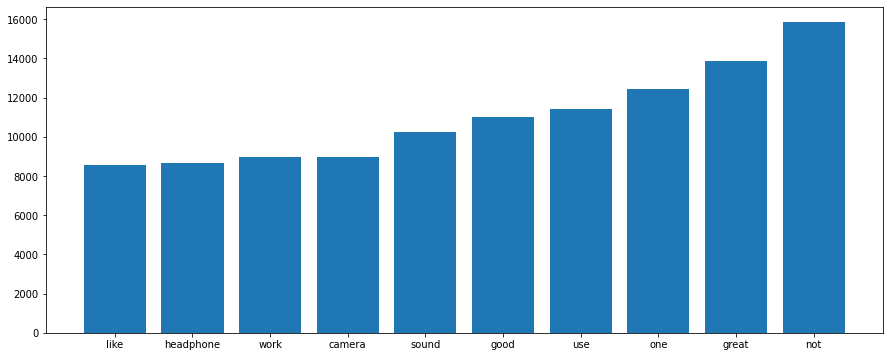

In [ ]:
plt.figure(figsize=(15, 6))
positive_feature_counts = np.sum(pos_feats, axis=0)
plot_top_ten_features(positive_feature_counts, vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


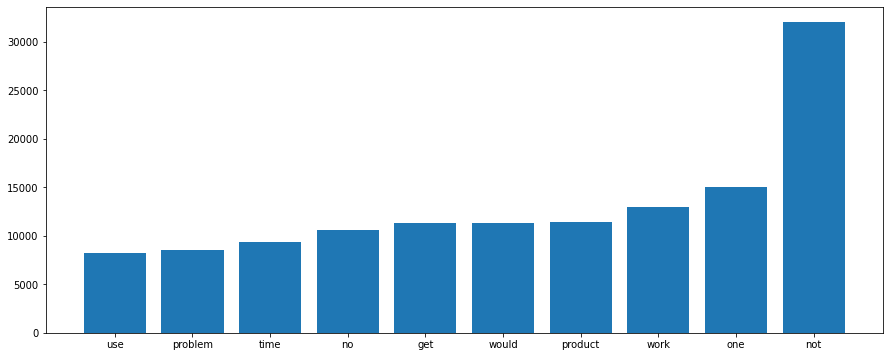

In [ ]:
plt.figure(figsize=(15, 6))
negative_feature_counts = np.sum(neg_feats, axis=0)
plot_top_ten_features(negative_feature_counts, vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


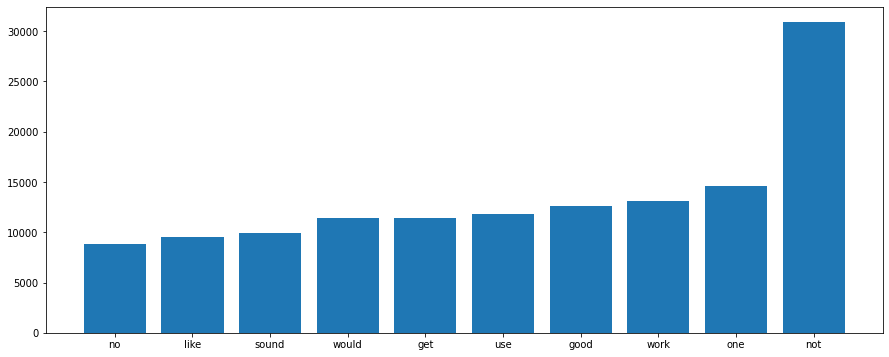

In [ ]:
plt.figure(figsize=(15, 6))
neutral_feature_counts = np.sum(neut_feats, axis=0)
plot_top_ten_features(neutral_feature_counts, vectorizer.get_feature_names())

# Baseline Model - Naive Bayes with CountVectorizer

In [ ]:
vectorizer = CountVectorizer(min_df = 0.01, max_df=0.95)
X = vectorizer.fit_transform(new_df['lemmatized_text'])

In [ ]:
y = new_df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
preds = model.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.63      0.66      0.65      6051
           0       0.58      0.56      0.57      5905
           1       0.72      0.72      0.72      5987

    accuracy                           0.65     17943
   macro avg       0.65      0.65      0.65     17943
weighted avg       0.65      0.65      0.65     17943



In [ ]:
print(confusion_matrix(y_test, preds))

[[4003 1474  574]
 [1531 3285 1089]
 [ 774  881 4332]]


# Other SKlearn Classification Models


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
hidden_layer_sizes=(15, 5), random_state=3)

clf.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 5), random_state=3,
              solver='lbfgs')
preds1 = clf.predict(X_test)
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

          -1       0.69      0.68      0.69      6051
           0       0.58      0.58      0.58      5905
           1       0.74      0.75      0.74      5987

    accuracy                           0.67     17943
   macro avg       0.67      0.67      0.67     17943
weighted avg       0.67      0.67      0.67     17943



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=50)
clf = SGDClassifier(loss="log", max_iter=50).fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(classification_report(y_test, preds2))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


              precision    recall  f1-score   support

          -1       0.69      0.70      0.70      6051
           0       0.62      0.54      0.57      5905
           1       0.72      0.81      0.76      5987

    accuracy                           0.68     17943
   macro avg       0.68      0.68      0.68     17943
weighted avg       0.68      0.68      0.68     17943



# SKlearn Classification Models with Bag-of-Words + Bigrams

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X = bigram_vectorizer.fit_transform(new_df['processed_text'])

In [ ]:
X.shape

(89715, 1972845)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.67      0.73      0.70      5909
           0       0.64      0.57      0.60      6026
           1       0.79      0.80      0.79      6008

    accuracy                           0.70     17943
   macro avg       0.70      0.70      0.70     17943
weighted avg       0.70      0.70      0.70     17943



In [ ]:
# Possible RAM issues
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 5), random_state=3)
# clf.fit(X_train, y_train)
# preds1 = clf.predict(X_test)
# print(classification_report(y_test, preds1))

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
clf.fit(X_train, y_train)
SGDClassifier(max_iter=50)
clf = SGDClassifier(loss="log", max_iter=50).fit(X_train, y_train)
preds2 = clf.predict(X_test)
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

          -1       0.70      0.70      0.70      5909
           0       0.63      0.55      0.59      6026
           1       0.73      0.83      0.77      6008

    accuracy                           0.69     17943
   macro avg       0.69      0.69      0.69     17943
weighted avg       0.69      0.69      0.69     17943



In [ ]:
new_df

,index,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,sentiment,processed_text,lemmatized_text
0,0,A13T2XWEGL7DU7,B00005T406,"Stuart Sweetow ""sweetow""","[1, 8]",this is a cheap trackball mouse and not as goo...,1.0,Marble Mouse Not a Man,-1,cheap trackball mouse not good microsoft trac...,cheap trackball mouse not good microsoft track...
1,1,A3ROMB95RLWSHV,B00007FGU7,Clutch,"[0, 0]",the cable i was shipped is not the one shown. ...,2.0,Not What was Shown,-1,cable shipped not one shown. huge! instead si...,cable shipped not one shown . huge ! instead s...
2,2,A22WDNLXFIETW5,B00007FGU7,Clintre,"[1, 1]",just has too much noise. anything i hook up ha...,1.0,Buzz,-1,much noise. anything hook buzz sound . would ...,much noise . anything hook buzz sound . would ...
3,3,A3RC8EMENZVZN6,B00007FGU7,Claudia R. Bautista,"[0, 0]",the length is perfect for my dorm room but i t...,1.0,No good,-1,length perfect dorm room tried 3 different he...,length perfect dorm room tried 3 different hea...
4,4,AFT8YMKCMJ3GC,B00007FGU7,Chris R,"[0, 0]",this cable does not connect properly and sound...,1.0,Bad Connection doesn't work,-1,cable not connect properly sound distorted. u...,cable not connect properly sound distorted . u...
...,...,...,...,...,...,...,...,...,...,...,...
89710,109995,ADW4R2F0W1MNE,B000023VUL,James McNeal,"[7, 7]",i purchased this hub to increase the number of...,5.0,Great device at a great price,1,purchased hub increase number usb ports machi...,purchased hub increase number usb port machine...
89711,109996,A1ORUSHRRG0VWN,B000023VUL,F. A. Soares,"[4, 4]",i bought this hub several months ago and i am ...,5.0,An awesome product,1,bought hub several months ago extremely pleas...,bought hub several month ago extremely pleased...
89712,109997,A7IKOAH6M8WAC,B000023VUL,Eric,"[2, 3]",i have had this for awhile and have not had an...,5.0,Works great!,1,awhile not problems. camera things plugged . ...,awhile not problem . camera thing plugged . ni...
89713,109998,A1PIHNRD8UIWEX,B000023VUL,D. Berglind,"[7, 7]","this hub is very small, easy to install, and i...",5.0,Simple to use/Easy on the wallet,1,"hub small, easy install, inexpensive. worth 5...","hub small , easy install , inexpensive . worth..."


In [ ]:
new_df.to_csv("/content/drive/MyDrive/Professional/Break Through AI/BTAI Verizon Project/processed_data.csv")

# Deep Learning


In [ ]:
# Changing the format of the data so we can try an LSTM-based model

In [ ]:
deep_learning_df = new_df[['sentiment','lemmatized_text']]

In [ ]:
deep_learning_df

,sentiment,lemmatized_text
0,-1,cheap trackball mouse not good microsoft track...
1,-1,cable shipped not one shown . huge ! instead s...
2,-1,much noise . anything hook buzz sound . would ...
3,-1,length perfect dorm room tried 3 different hea...
4,-1,cable not connect properly sound distorted . u...
...,...,...
89710,1,purchased hub increase number usb port machine...
89711,1,bought hub several month ago extremely pleased...
89712,1,awhile not problem . camera thing plugged . ni...
89713,1,"hub small , easy install , inexpensive . worth..."


In [ ]:
all_tokens = []
for row in deep_learning_df['lemmatized_text']:
  tokens = word_tokenize(row)
  all_tokens.append(tokens)

In [ ]:
max_len = 1501

In [ ]:
tokens_padded = []
for review in all_tokens:
  num_padding = max_len - len(review)
  if num_padding > 0:
    review += ['PAD'] * num_padding
  else:
    review = review[:max_len]
  tokens_padded.append(review)

In [ ]:
tokens_padded_array = np.array(tokens_padded, dtype=object)

In [ ]:
tokens_padded_array.shape

(89715, 1501)

In [ ]:
tokens_df = pd.DataFrame(tokens_padded_array)

In [ ]:
deep_learning_df = pd.concat([deep_learning_df, tokens_df], axis=1)

In [ ]:
deep_learning_df = deep_learning_df[deep_learning_df[1500] == 'PAD']

In [ ]:
deep_learning_df.drop(['lemmatized_text'], axis=1, inplace=True)

In [ ]:
deep_learning_df.head()

,sentiment,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,-1,cheap,trackball,mouse,not,good,microsoft,trackball,mouse,cost,much,.,small,ball,move,easily,",",hard,accurate,.,since,cheap,",",didn,',bother,returning,.,expected,logitech,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1,-1,cable,shipped,not,one,shown,.,huge,!,instead,single,small,cable,end,end,",",two,fat,cable,one,jack,.,fat,bulky,.,way,bigger,cable,would,necessary,.,should,sent,back,",",didn,',want,go,thru,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
2,-1,much,noise,.,anything,hook,buzz,sound,.,would,send,back,",",not,worth,hassle,.,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
3,-1,length,perfect,dorm,room,tried,3,different,headphone,connection,still,not,best,tv,viewing,",",lose,sound,movement,doesn,',seem,catch,stereo,feed,time,.,not,happy,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
4,-1,cable,not,connect,properly,sound,distorted,.,unusable,waist,money,.,buyer,beware,!,!,!,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD


In [ ]:
input_length = 1501
features = []
for i in range(input_length):
    features.append(i)

In [ ]:
data = deep_learning_df[features].values
labels = deep_learning_df['sentiment'].values

In [ ]:
word2id = {}
id2word = {}
unassigned_id = 0
for review in data:
    for token in review:
        if token not in word2id:
            word2id[token] = unassigned_id
            id2word[unassigned_id] = token
            unassigned_id += 1
vocab_size = len(word2id)
print ('Vocab size: ', vocab_size)

Vocab size:  132227


In [ ]:
deep_learning_df[features].replace(to_replace=word2id)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
# For Neural Networks
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Reshape
from keras.layers import Embedding
from keras.layers import LSTM

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

In [ ]:
def create_rnn_model():
    tf.random.set_seed(1234)
    # create model
    model = Sequential()
    model.add(Embedding(vocab_size, 32))
    pass
    model.add(LSTM(32))
    pass
    model.add(Dense(2, activation='softmax')) 
    # Compile model
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_rnn_model,
                        epochs=6,
                        batch_size=150,
                        verbose=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_features, testing_features, training_labels, testing_labels = train_test_split(deep_learning_df[features], deep_learning_df['sentiment'], test_size=0.2)

In [ ]:
training_features.to_csv('/content/drive/MyDrive/Professional/Break Through AI/BTAI Verizon Project/training_features.csv')
testing_features.to_csv('/content/drive/MyDrive/Professional/Break Through AI/BTAI Verizon Project/testing_features.csv')
training_labels.to_csv('/content/drive/MyDrive/Professional/Break Through AI/BTAI Verizon Project/training_labels.csv')
testing_labels.to_csv('/content/drive/MyDrive/Professional/Break Through AI/BTAI Verizon Project/testing_labels.csv')

In [ ]:
model.fit(x=training_features, y=training_labels)
# print summary
print (model.model.summary())

In [ ]:
training_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
44316,10,14280,2578,103,2,9,1144,438,88,810,2047,25,26,10711,35,354,2149,55,59,1256,253,134,2262,46,23,16,1003,22,10,922,71,3725,10,810,195,2,1799,46,466,14474,...,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
26114,0,74,1,359,2507,66916,23,1,52041,101,359,9986,66917,2692,12,1,3710,25,3394,22,8,10,493,48,71,10,23197,77,1467,2187,12,234,21,943,149,16,218,146,1430,26,...,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
9275,29,441,7,582,88,566,328,88,1075,179,10745,2489,101,0,38,16,29,557,10,1075,101,88,785,943,38,6,10,2489,39,366,16,2,4074,39,1639,35,401,1574,1508,1508,...,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
7271,0,776,1,2746,16,23,1400,109,10,1953,29,295,166,4391,16,29,248,246,354,46,10,28213,966,46,10,1733,156,617,251,10,1733,1028,16,469,10,411,1570,308,108,109,...,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
60709,10,2029,3061,1499,1,2,2709,776,22,6,2,1234,5407,108,10,1765,449,499,278,59,211,654,500,10389,776,1,2769,5535,25,10,15,4552,3443,8105,6,8105,8103,776,22,6,...,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
